In [1]:
import mne
import numpy as np
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('EyeClosed1.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.37it/s]


1     2     3     4       5     6     7      8     9    10  ...     12  \
0  93.6  3.75  5.26  4.24  1.3800 -1.53  2.72  2.150  3.95  2.80  ... -1.130   
1  93.6  3.40  5.49  4.61  0.8350 -2.37  2.95  0.996  3.73  2.88  ...  0.506   
2  93.6  2.82  5.46  4.66 -0.0542 -3.19  3.02 -0.558  3.15  2.62  ...  3.220   

       13    14    15     16    17    18    19      20     21  
0 -0.0792  5.59 -8.04 -2.610  2.57 -1.12 -5.49 -0.0478 -109.0  
1  1.6200  6.98 -6.70 -1.510  3.98 -1.97 -4.79  0.8570 -109.0  
2  4.2700  9.11 -4.04  0.427  6.28 -1.66 -3.22  2.2600 -109.0  

[3 rows x 21 columns]

In [3]:
# Assuming you already have a DataFrame called 'df' with 21 columns

# Define the column ranges for Participant 1 and Participant 2
participant1_columns = range(2, 11)
participant2_columns = range(12, 21)

# Create separate DataFrames for Participant 1 and Participant 2
df_participant1 = df.iloc[:, participant1_columns].copy()
df_participant2 = df.iloc[:, participant2_columns].copy()

# Define the new column names for Participant 1 & 2
participant1_new_column_names = [
    'F3',
    'Fz',
    'F4',
    'C3',
    'Cz',
    'C4',
    'P3',
    'Pz',
    'P4',
]


# Assign the new column names to Participant 1 DataFrame
df_participant1.columns = participant1_new_column_names

# Assign the new column names to Participant 2 DataFrame
df_participant2.columns = participant1_new_column_names

# Print the Participant 1 DataFrame
print("Participant 1 DataFrame:")
df_participant1



Participant 1 DataFrame:


F3     Fz       F4      C3     Cz      C4       P3      Pz     P4
0       5.26   4.24   1.3800   -1.53   2.72   2.150   3.9500   2.800 -139.0
1       5.49   4.61   0.8350   -2.37   2.95   0.996   3.7300   2.880 -139.0
2       5.46   4.66  -0.0542   -3.19   3.02  -0.558   3.1500   2.620 -139.0
3       4.81   4.02  -1.5400   -3.97   2.61  -2.780   1.8900   1.870 -139.0
4       3.47   2.65  -3.5700   -4.61   1.71  -5.530   0.0622   0.716 -139.0
...      ...    ...      ...     ...    ...     ...      ...     ...    ...
23961 -46.40 -55.80 -45.6000 -151.00 -61.50 -52.100 -53.5000 -56.400 -142.0
23962 -44.60 -54.30 -43.5000 -151.00 -59.60 -49.700 -51.0000 -54.100 -142.0
23963 -42.60 -52.60 -40.9000 -151.00 -57.30 -46.700 -48.1000 -51.700 -142.0
23964 -40.50 -50.80 -38.3000 -151.00 -55.00 -43.800 -45.5000 -49.600 -142.0
23965 -38.90 -49.40 -36.3000 -151.00 -53.20 -41.700 -43.5000 -48.300 -142.0

[23966 rows x 9 columns]

In [4]:
# Print the Participant 3 DataFrame
print("\nParticipant 2 DataFrame:")
df_participant2


Participant 2 DataFrame:


F3     Fz    F4     C3     Cz    C4    P3      Pz     P4
0      -0.0792   5.59 -8.04 -2.610   2.57 -1.12 -5.49 -0.0478 -109.0
1       1.6200   6.98 -6.70 -1.510   3.98 -1.97 -4.79  0.8570 -109.0
2       4.2700   9.11 -4.04  0.427   6.28 -1.66 -3.22  2.2600 -109.0
3       5.7800   9.92 -2.10  1.350   7.30 -2.00 -2.93  2.0100 -109.0
4       5.2900   8.68 -1.95  0.542   6.26 -3.78 -4.77 -0.6250 -109.0
...        ...    ...   ...    ...    ...   ...   ...     ...    ...
23961  11.6000  11.70  8.03  8.870  10.40  9.34  6.56  9.6700 -112.0
23962   9.7400   9.83  6.35  6.840   8.33  8.05  4.63  7.3600 -112.0
23963   7.5600   7.61  4.38  4.710   6.07  6.26  2.42  4.9400 -112.0
23964   6.2800   6.39  3.37  3.640   5.00  5.09  1.31  3.9500 -112.0
23965   6.9200   7.27  4.42  4.490   6.15  5.65  2.45  5.6000 -112.0

[23966 rows x 9 columns]

In [5]:
import mne
import pandas as pd


# Extract the channel names from the DataFrame columns
ch_names = participant1_new_column_names 

# Extract the data values from the DataFrame
data = df_participant1.values

# Create the channel types (assuming they are all 'eeg')
ch_types = ['eeg'] * len(ch_names)

# Define the sampling frequency of the data in Hz
sfreq = 1024# chnage it to 1024

# Create the info object for the raw data
info = mne.create_info(ch_names, sfreq, ch_types)

# Create the raw object
raw1 = mne.io.RawArray(data.T, info)


Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


In [6]:
import mne
import pandas as pd


# Extract the channel names from the DataFrame columns
ch_names = participant1_new_column_names 

# Extract the data values from the DataFrame
data = df_participant2.values

# Create the channel types (assuming they are all 'eeg')
ch_types = ['eeg'] * len(ch_names)

# Define the sampling frequency of the data in Hz
sfreq = 1024

# Create the info object for the raw data
info = mne.create_info(ch_names, sfreq, ch_types)

# Create the raw object
raw2 = mne.io.RawArray(data.T, info)


Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs
# pick the EEG channels for ICA
picks = mne.pick_types(raw1.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks for participant1
#n_components = 20
ica = ICA(random_state=0)
ica.fit(raw1, picks=picks)


Fitting ICA to data using 9 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 9 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_10484\2180611296.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw1, picks=picks)


Fitting ICA took 0.3s.


<ICA | raw data decomposition, method: fastica (fit in 12 iterations on 23966 samples), 9 ICA components (9 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.
Using matplotlib as 2D backend.


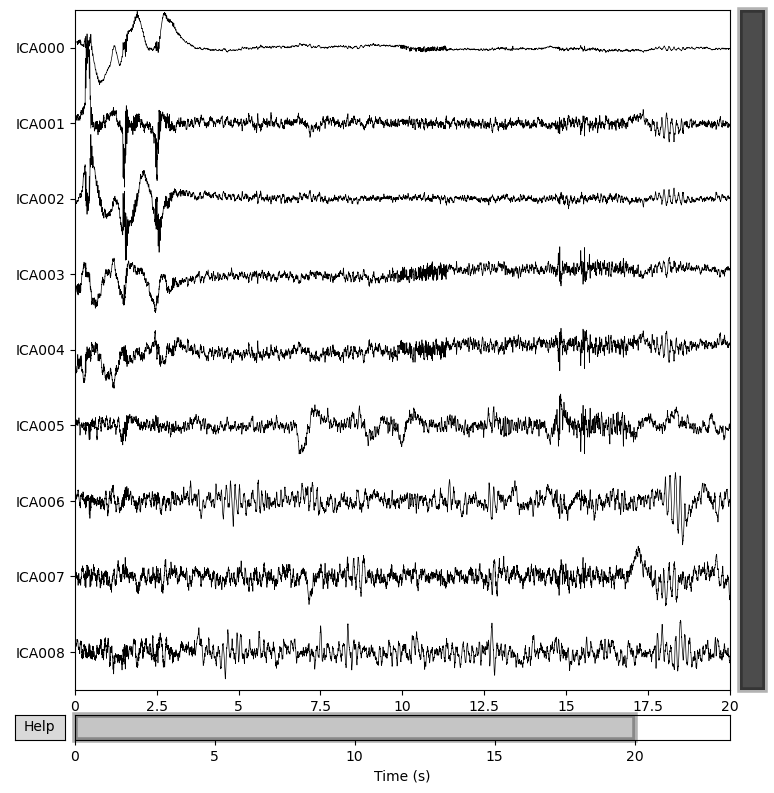

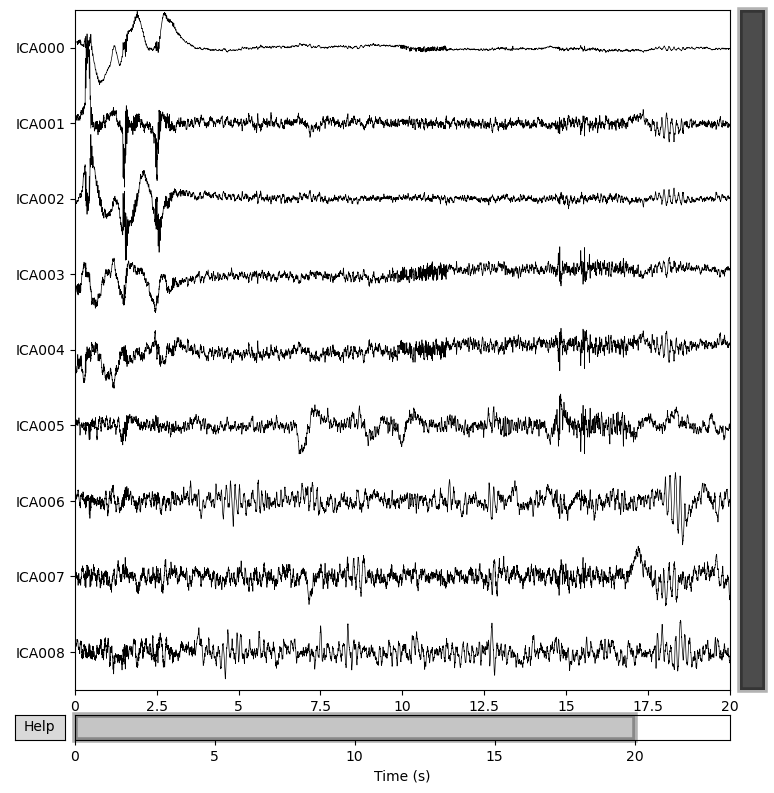

In [8]:
 ica.plot_sources(raw1, block=False)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs
# pick the EEG channels for ICA
picks = mne.pick_types(raw2.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
#n_components = 20
ica = ICA(random_state=0)
ica.fit(raw2, picks=picks)


Fitting ICA to data using 9 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 9 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_10484\370007711.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw2, picks=picks)


Fitting ICA took 2.2s.


<ICA | raw data decomposition, method: fastica (fit in 678 iterations on 23966 samples), 9 ICA components (9 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=9, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


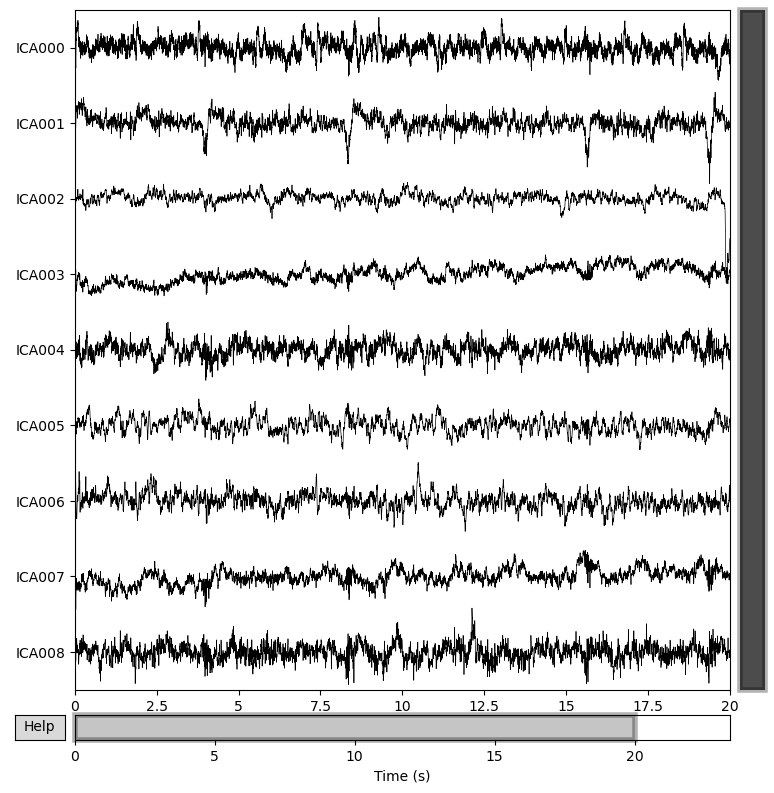

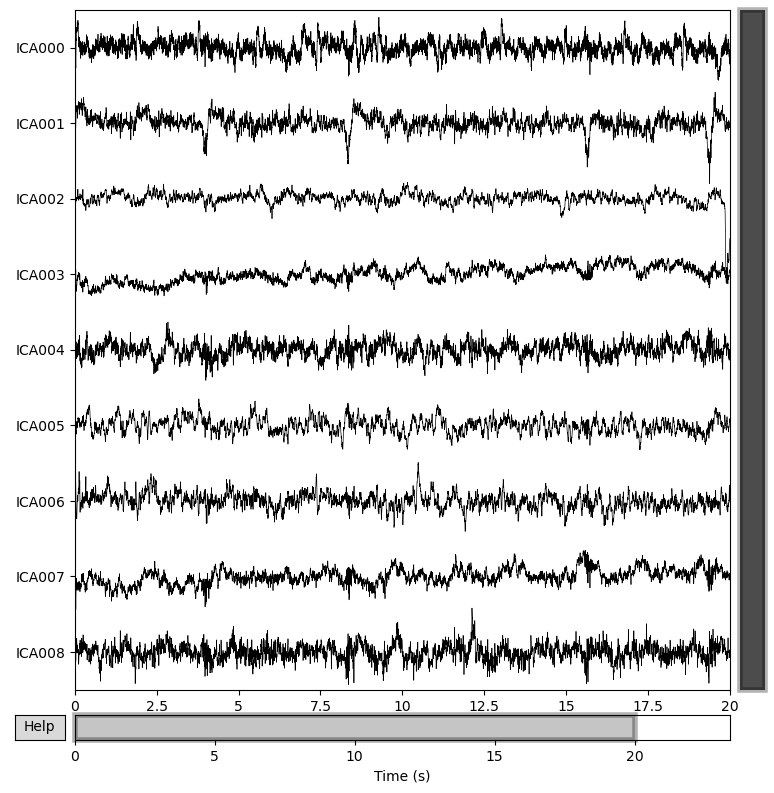

In [10]:
 ica.plot_sources(raw2, block=False)

### First particpant analysis EEG Data

 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


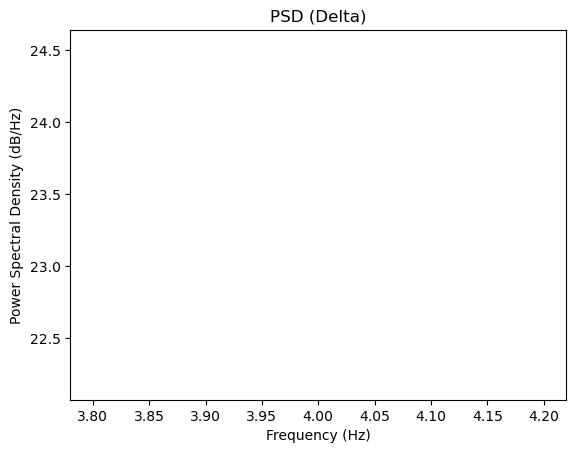

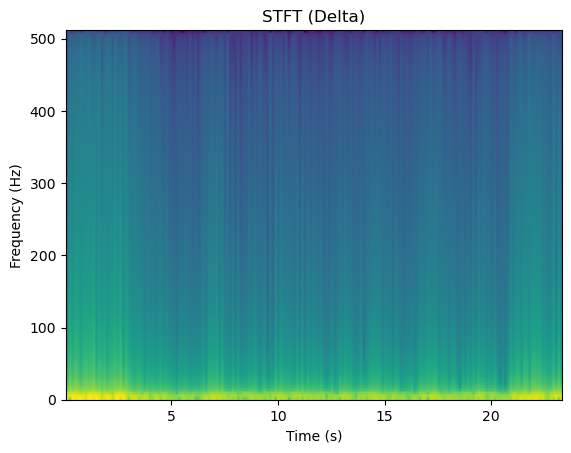

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


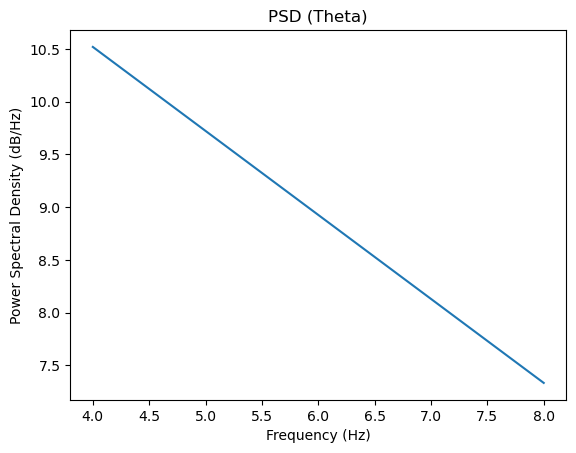

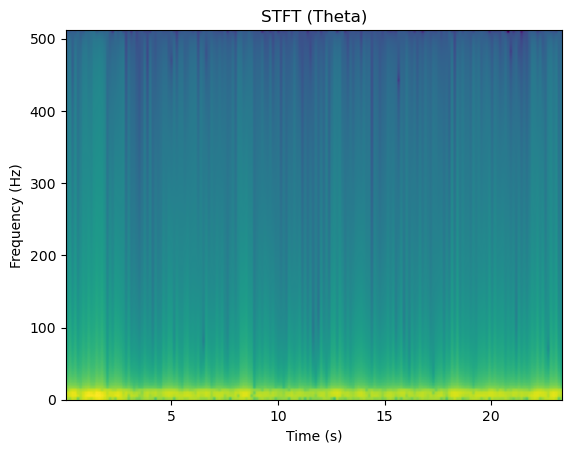

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


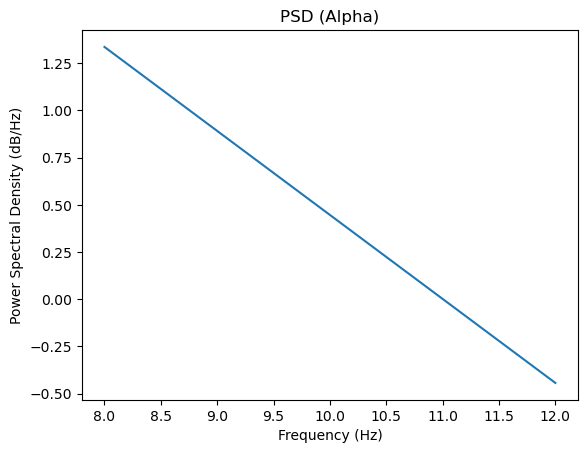

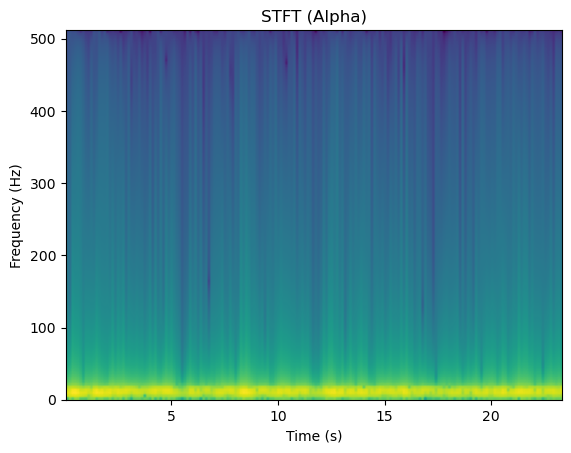

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


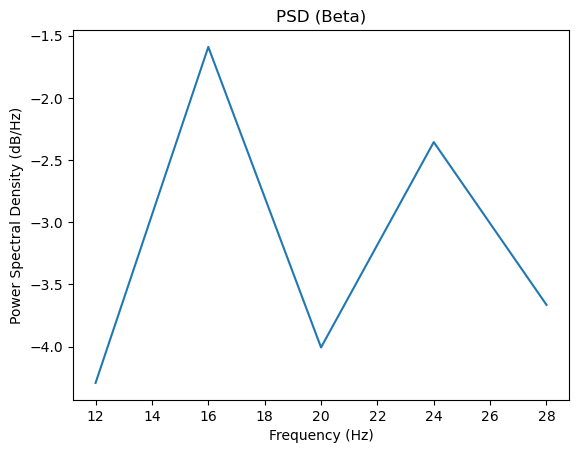

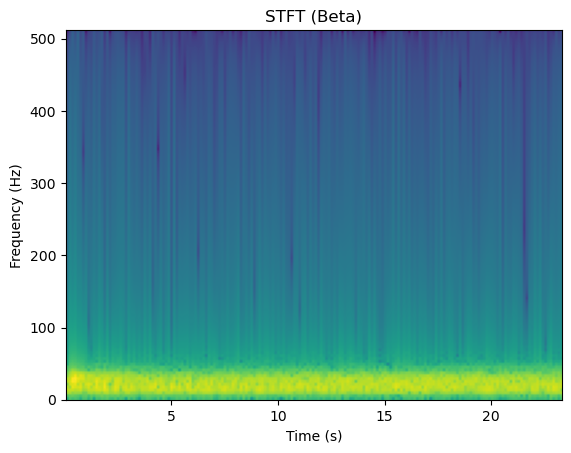

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


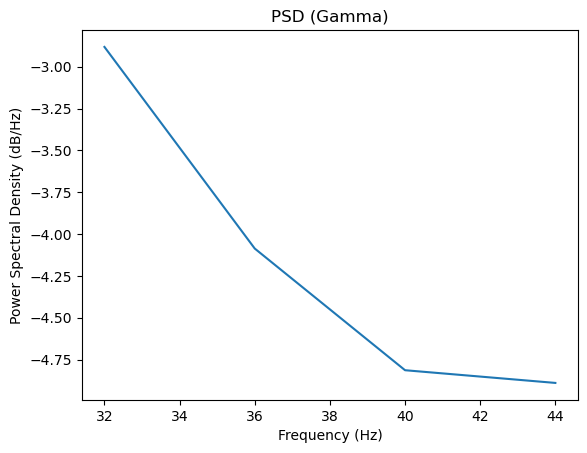

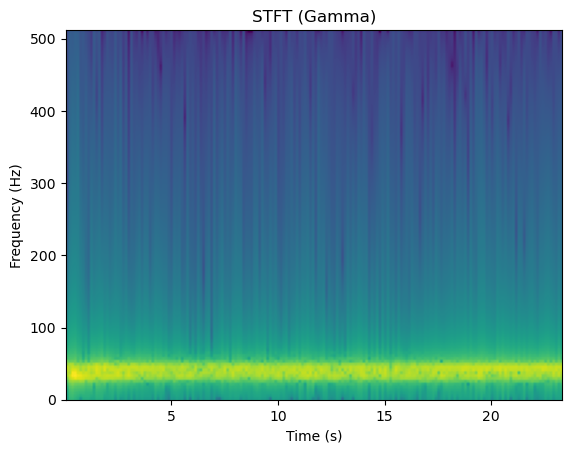

In [11]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw1.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

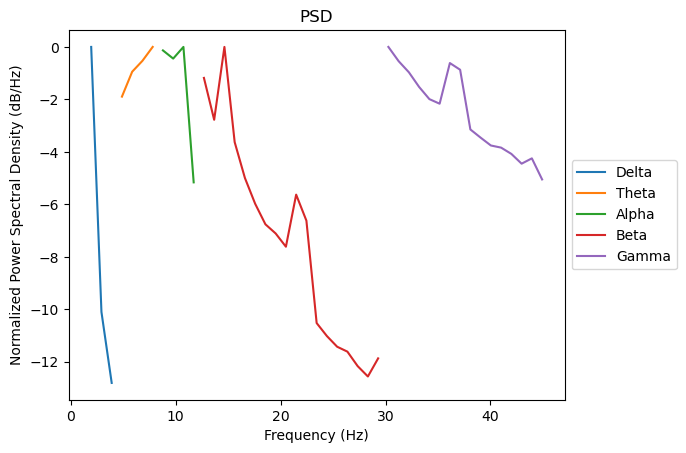

In [12]:
# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df_participant1.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Normalize PSD by dividing by the sum of all PSD values
    normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd /= np.max(normalized_psd)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(normalized_psd), label=band, color=plt.cm.tab10(i))

# Add a legend and labels outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Show the figure
plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


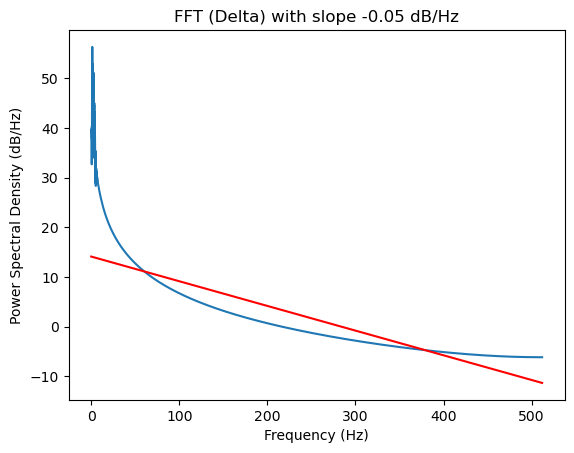

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


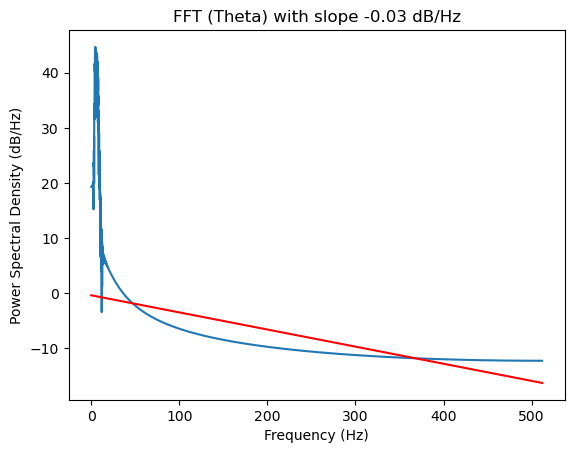

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


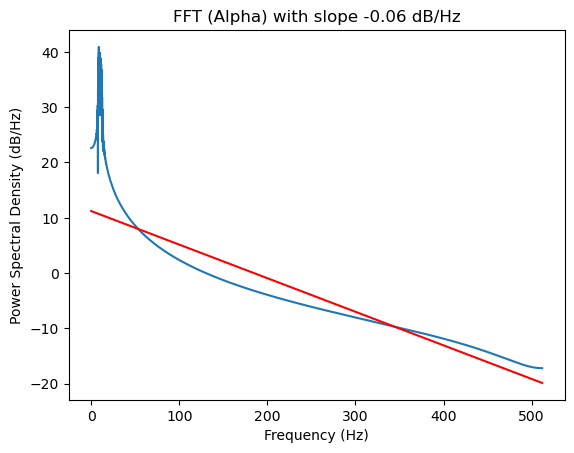

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


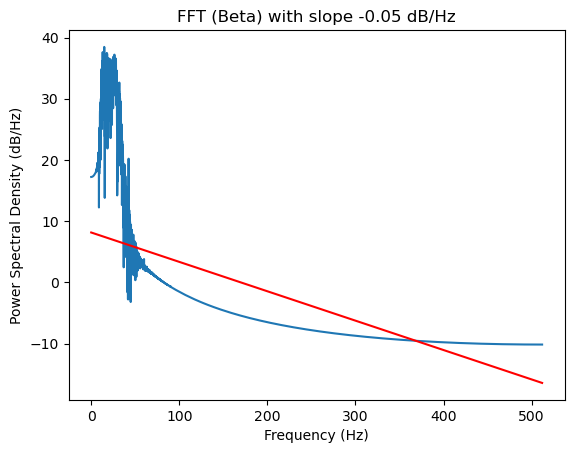

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


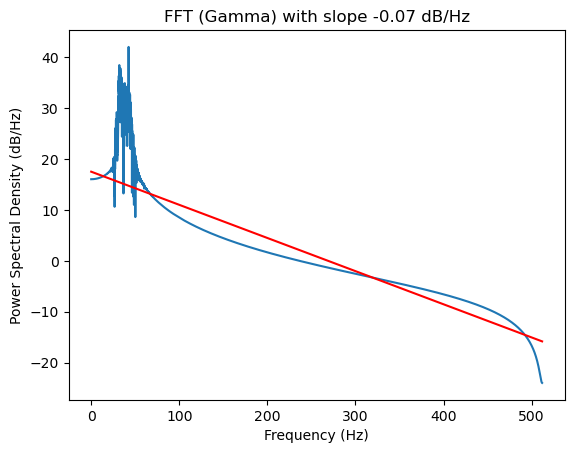

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw1.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

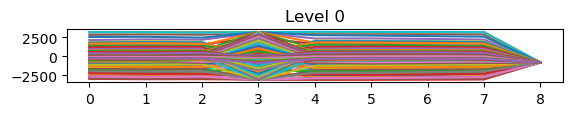

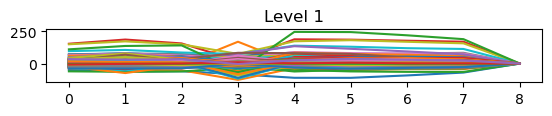

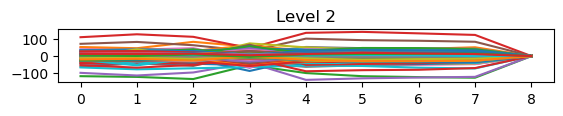

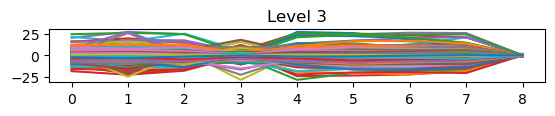

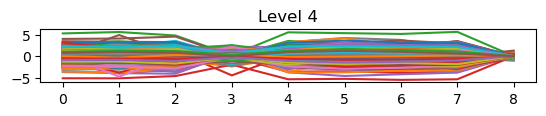

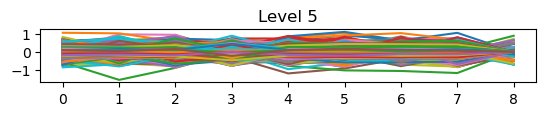

mean_spectrum: [4.43056097e+05 3.55039730e+02 1.34780870e+02 1.28081303e+01
 5.41583659e-01 1.78021750e-02]
var_spectrum: [4.09637681e+10 2.08707797e+04 2.69220457e+03 3.74383583e+01
 6.52127848e-02 3.06477454e-05]


In [14]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw1.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [15]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw1.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw1.ch_names), len(raw1.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw1.ch_names, columns=raw1.ch_names)

# Print the connectivity matrix in a neat format
df_causality


F3             Fz             F4             C3             Cz  \
F3   0.000000e+00  2.708160e-222  2.063597e-153  4.548864e-194   1.404541e-21   
Fz  3.180334e-173   0.000000e+00   2.769891e-17  8.893215e-183  4.311685e-176   
F4  2.821950e-128   1.026686e-09   0.000000e+00  7.070049e-184  1.071675e-279   
C3   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
Cz   9.332277e-34  3.763828e-225   0.000000e+00  3.627693e-201   0.000000e+00   
C4   9.403053e-05   1.562375e-55  1.692579e-301  7.859028e-169   1.022358e-07   
P3   5.451534e-01   1.172474e-43  8.293642e-259  1.188537e-182   2.451486e-50   
Pz   1.331299e-01   2.146388e-34  2.033132e-166  1.168254e-189   1.231873e-91   
P4   5.219279e-01   4.830643e-01   4.997644e-01   4.133556e-01   4.610243e-01   

               C4             P3             Pz            P4  
F3   4.399304e-02   1.975538e-01   5.066654e-05  4.060759e-01  
Fz   5.670339e-44   1.765373e-31   3.328491e-20  5.379190e-01  
F4  1.211861e-296  2.092378e-233  1.209139e-125  5.755863e-01  
C3   0.000000e+00   0.000000e+00   0.000000e+00  2.422499e-12  
Cz   1.638589e-15   8.709861e-68  2.593778e-119  6.043654e-01  
C4   0.000000e+00   2.038703e-54   1.949666e-61  6.485706e-01  
P3   5.793095e-45   0.000000e+00   2.253046e-20  6.058479e-01  
Pz   2.896454e-42   9.304318e-12   0.000000e+00  6.146415e-01  
P4   4.724681e-01   4.794374e-01   4.828109e-01  0.000000e+00

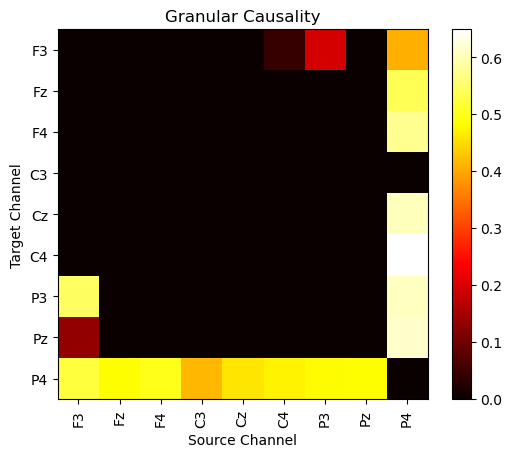

In [16]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw1.ch_names)), raw1.ch_names, rotation=90)
plt.yticks(np.arange(len(raw1.ch_names)), raw1.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()


### Second participant analysis EEG data

 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


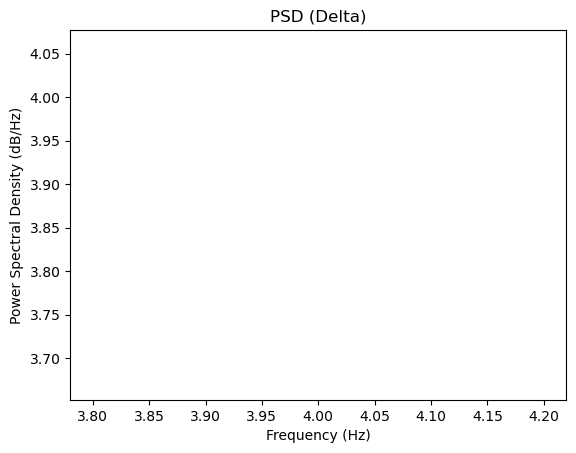

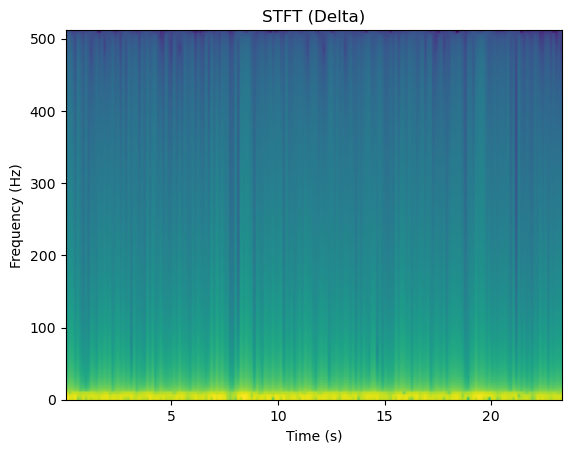

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


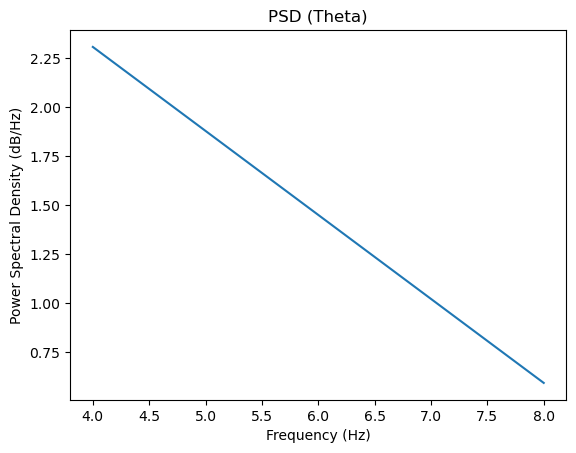

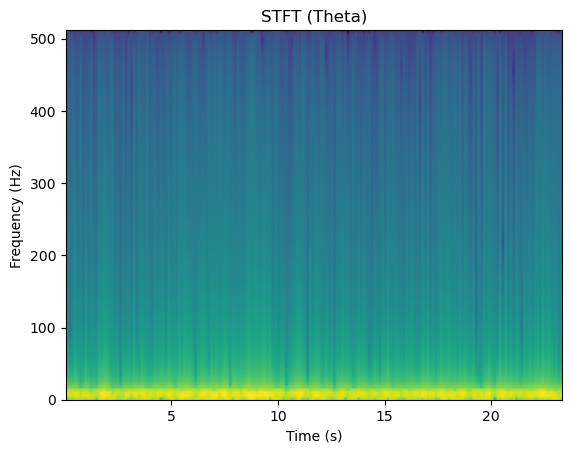

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


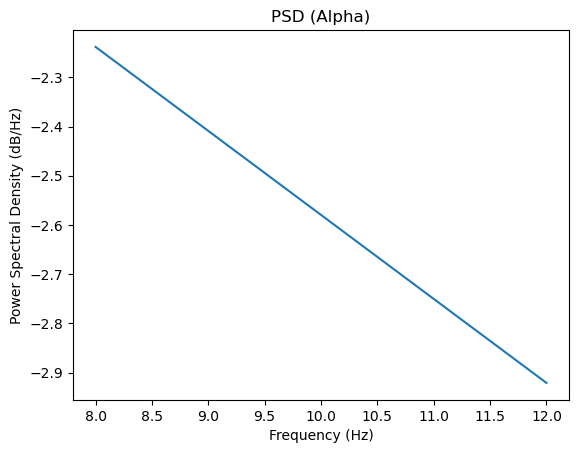

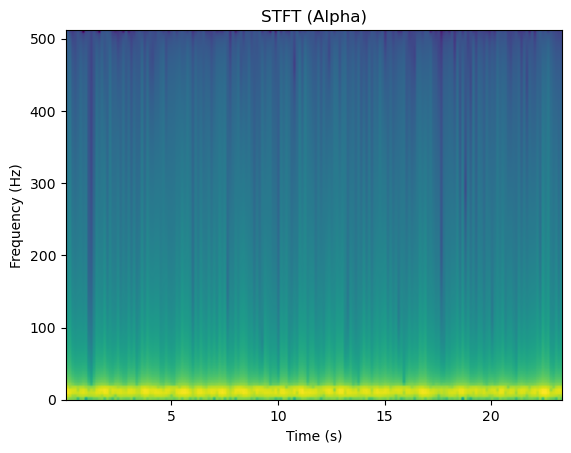

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


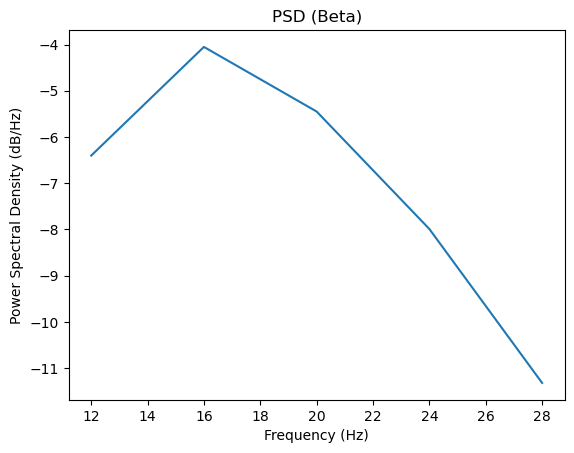

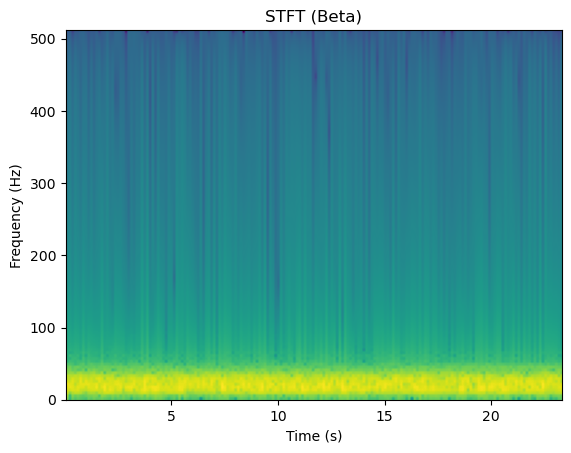

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


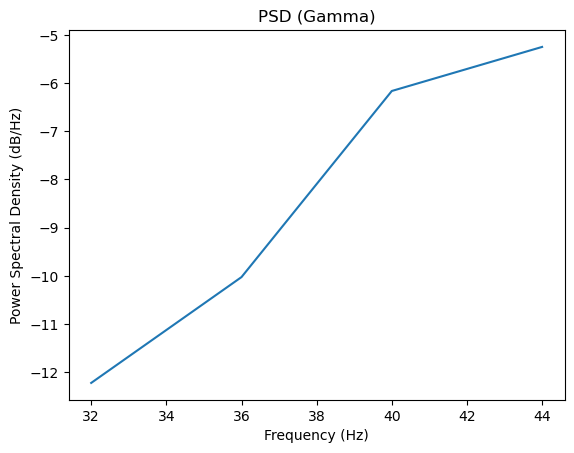

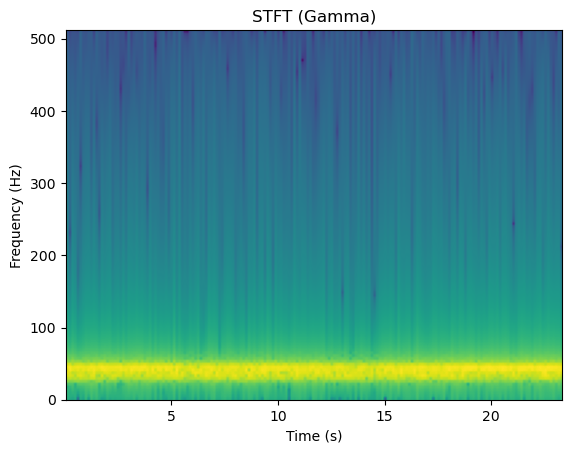

In [17]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw2.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

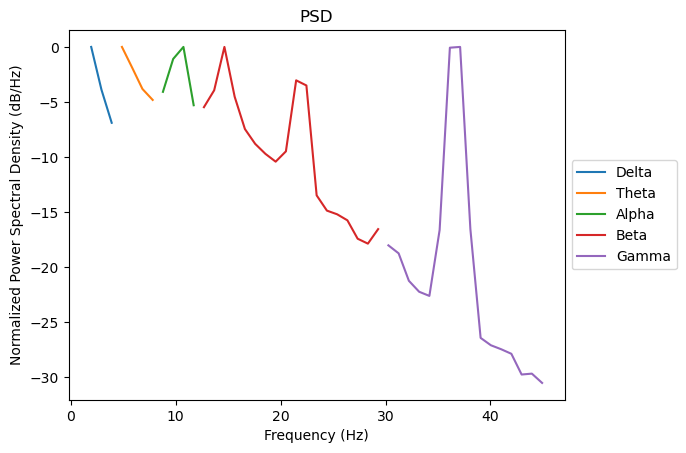

In [18]:

# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df_participant2.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Normalize PSD by dividing by the sum of all PSD values
    normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd /= np.max(normalized_psd)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(normalized_psd), label=band, color=plt.cm.tab10(i))

# Add a legend and labels outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Show the figure
plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


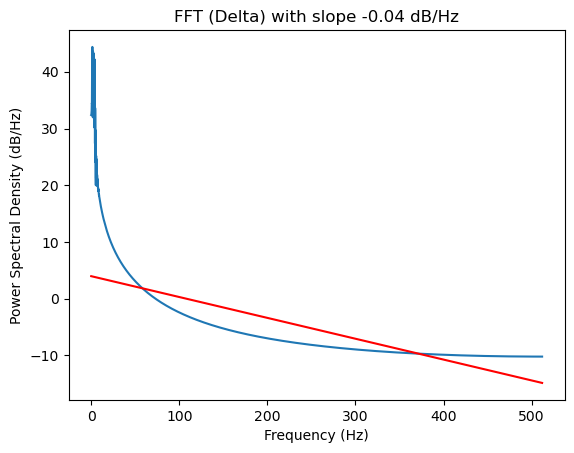

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


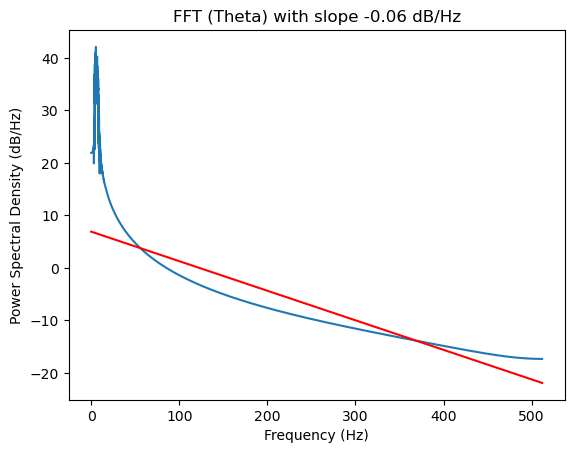

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


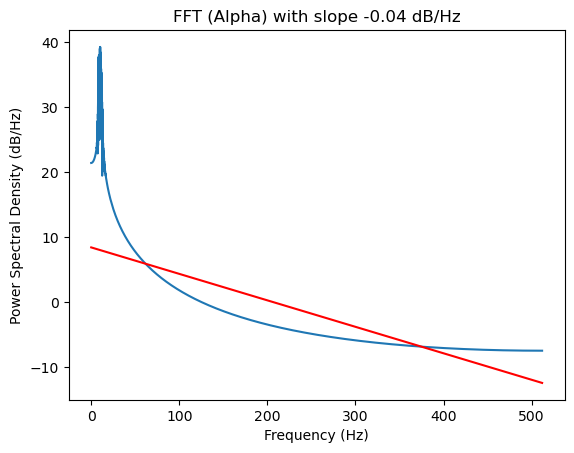

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


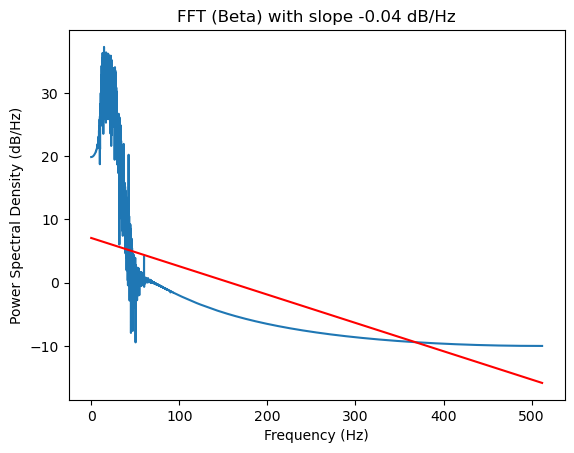

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


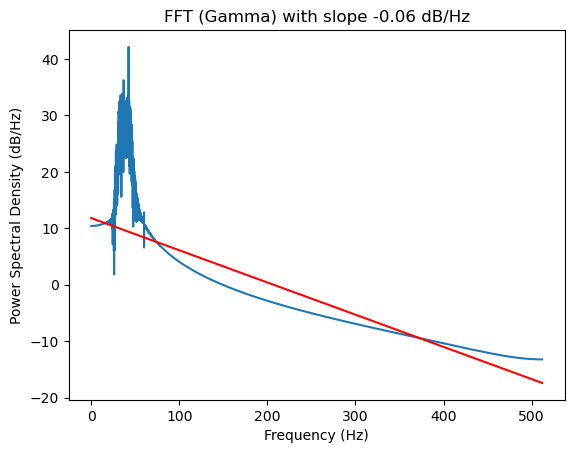

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw2.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

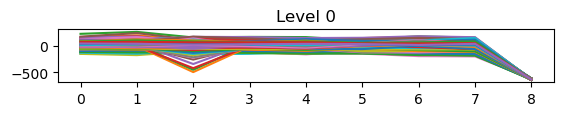

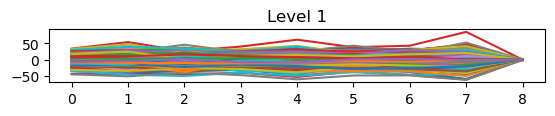

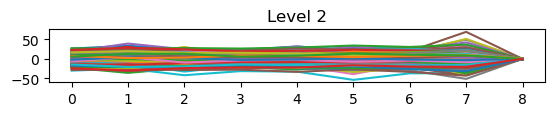

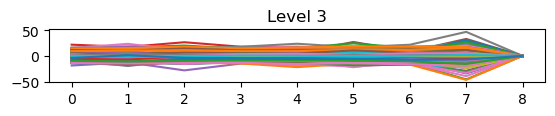

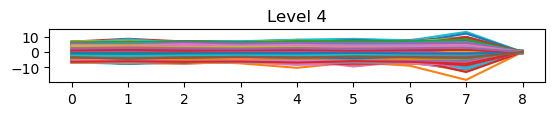

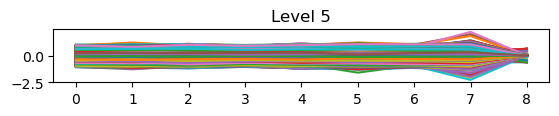

mean_spectrum: [4.63416639e+04 1.40794235e+02 9.11800905e+01 3.04262541e+01
 9.49952385e+00 2.20452424e-01]
var_spectrum: [1.53780758e+10 3.88205429e+03 1.77800423e+03 2.01061555e+02
 1.23092624e+01 6.44073285e-03]


In [20]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw2.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [21]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw2.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw2.ch_names), len(raw2.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw2.ch_names, columns=raw2.ch_names)

# Print the connectivity matrix in a neat format
df_causality



F3            Fz        F4            C3            Cz  \
F3  0.000000e+00  8.580682e-01  0.001374  6.155855e-10  1.314352e-10   
Fz  1.088416e-01  0.000000e+00  0.000386  2.050709e-09  3.358169e-09   
F4  1.970125e-17  1.595036e-14  0.000000  4.149839e-22  9.341115e-23   
C3  4.853040e-01  6.827807e-01  0.077032  0.000000e+00  4.017972e-03   
Cz  5.856308e-01  4.502612e-02  0.069885  1.780146e-02  0.000000e+00   
C4  7.163094e-01  7.804890e-01  0.256107  7.271798e-01  4.841315e-01   
P3  1.265503e-03  1.790733e-03  0.001497  3.480866e-05  1.780581e-06   
Pz  3.367373e-01  6.069752e-01  0.027640  3.855173e-02  4.334223e-02   
P4  5.675817e-01  4.007345e-01  0.950592  6.168908e-01  5.876845e-01   

              C4            P3            Pz        P4  
F3  1.754969e-21  2.427424e-10  1.297878e-08  0.571081  
Fz  2.976259e-20  6.317922e-11  1.356981e-06  0.451266  
F4  1.589731e-37  2.672786e-20  2.374299e-16  0.625257  
C3  3.825259e-15  3.888286e-03  3.339274e-03  0.638061  
Cz  8.697684e-13  8.458617e-04  6.235364e-02  0.594864  
C4  0.000000e+00  2.441148e-02  1.463949e-01  0.505336  
P3  6.122902e-18  0.000000e+00  3.078871e-04  0.447765  
Pz  3.610332e-08  4.207793e-01  0.000000e+00  0.523691  
P4  8.629026e-01  8.713243e-01  6.172926e-01  0.000000

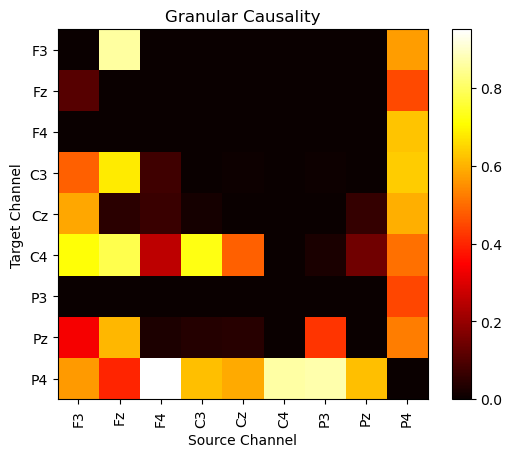

In [22]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw2.ch_names)), raw2.ch_names, rotation=90)
plt.yticks(np.arange(len(raw2.ch_names)), raw2.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()


### EMG DATA ANALYSIS - Fingure Movment data

In [23]:
# Extract columns 'col11' and 'col21' into a new DataFrame
new_df = df[['11', '21']].copy()

# Print the new DataFrame
new_df


11     21
0     -139.0 -109.0
1     -139.0 -109.0
2     -139.0 -109.0
3     -139.0 -109.0
4     -139.0 -109.0
...      ...    ...
23961 -142.0 -112.0
23962 -142.0 -112.0
23963 -142.0 -112.0
23964 -142.0 -112.0
23965 -142.0 -112.0

[23966 rows x 2 columns]

In [24]:
import mne
import pandas as pd


sfreq = 1024  # Sampling frequency in Hz
ch_names = ['EMG1', 'EMG2']  # Channel names
ch_types = ['emg'] * len(ch_names)  # Channel types, set as 'emg' for EMG data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(new_df.T, info)




Creating RawArray with float64 data, n_channels=2, n_times=23966
    Range : 0 ... 23965 =      0.000 ...    23.403 secs
Ready.


 -------------------*********** For Band: Delta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


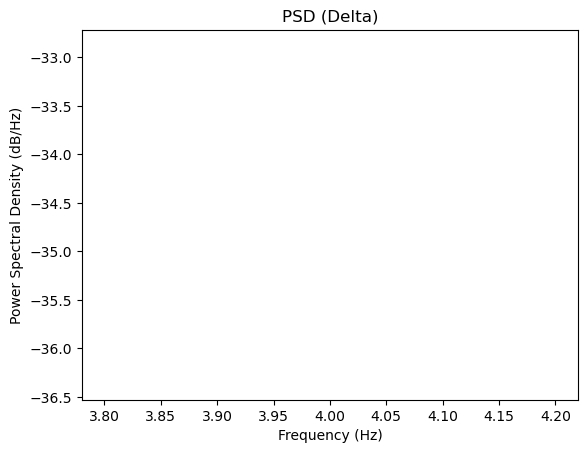

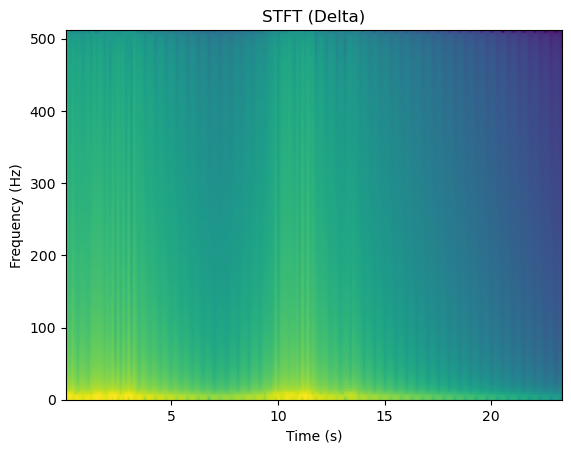

 -------------------*********** For Band: Theta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


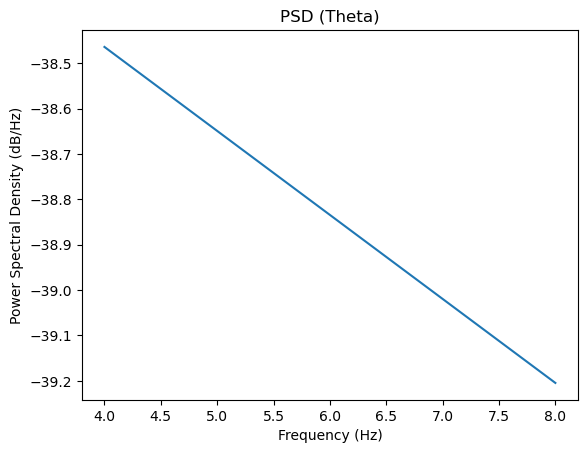

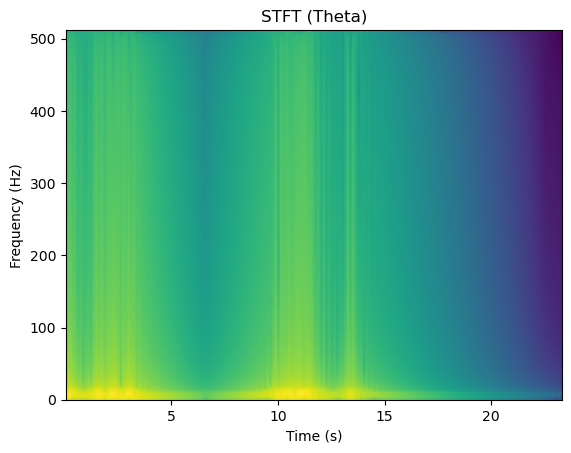

 -------------------*********** For Band: Alpha  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


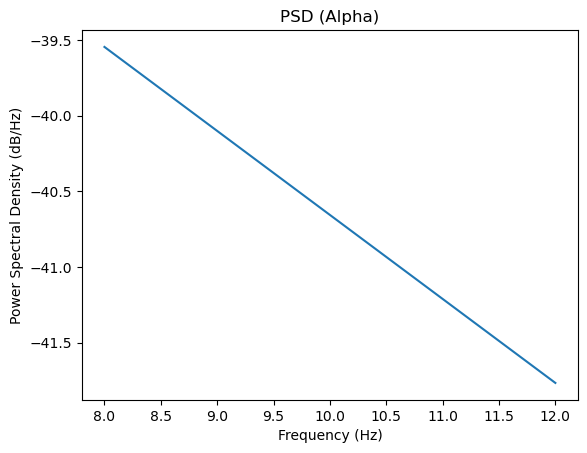

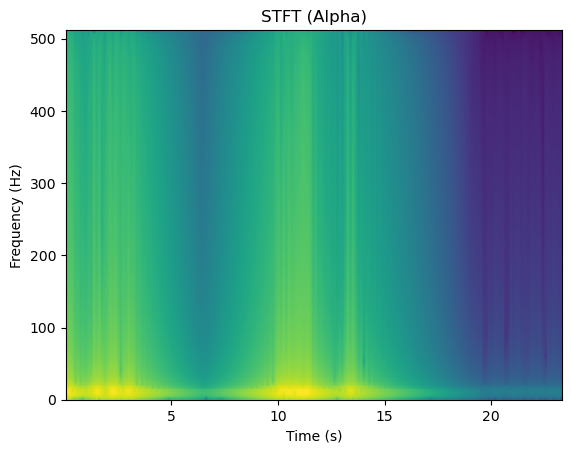

 -------------------*********** For Band: Beta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


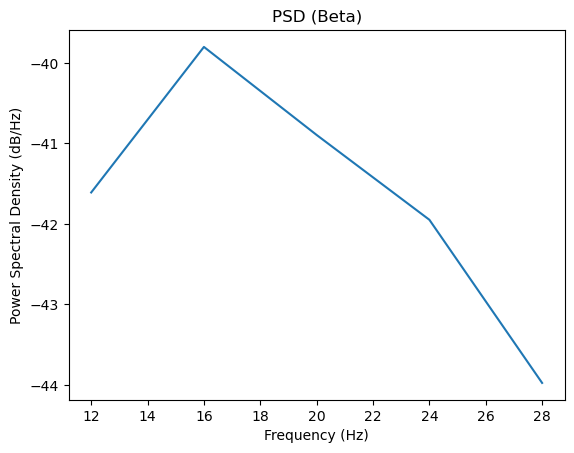

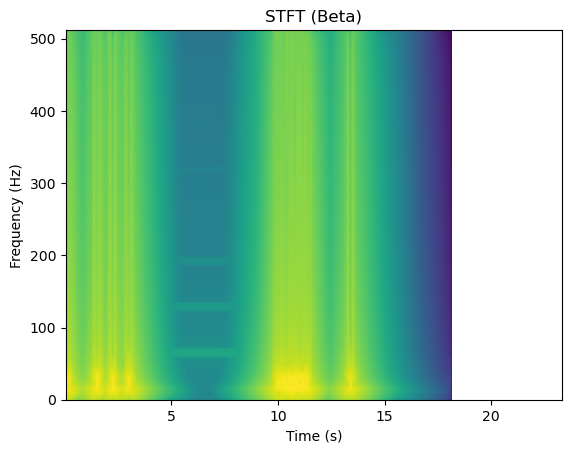

 -------------------*********** For Band: Gamma  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


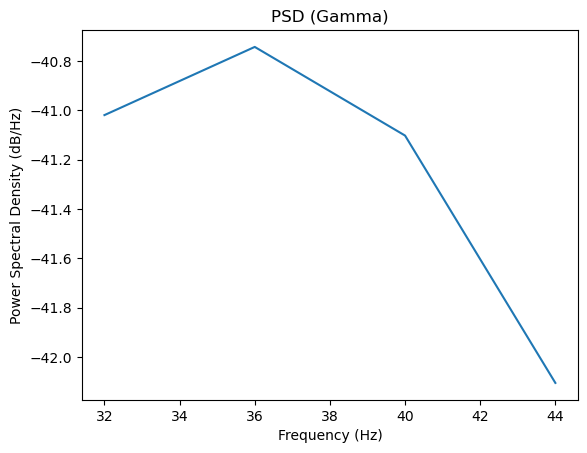

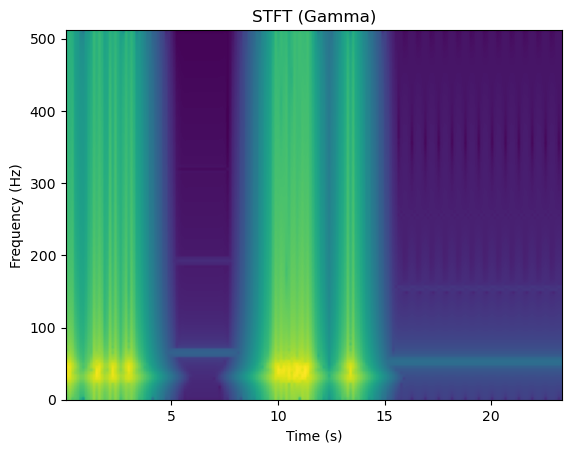

In [25]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    # Define the picks variable with the desired channel types
    #picks = mne.pick_types(raw.info, meg=False, eeg=False, emg=True)
    # Explicitly pass picks to mne.pick_types
    emg_picks = mne.pick_types(info, emg=True)
    raw_band = raw.copy().filter(fmin, fmax, picks=emg_picks, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
   

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


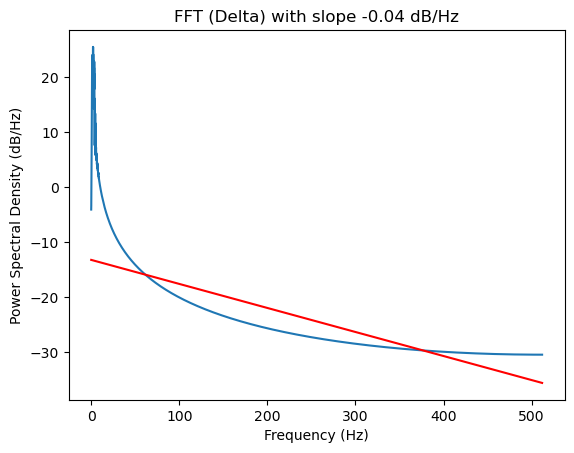

 -------------------*********** For Band: Theta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


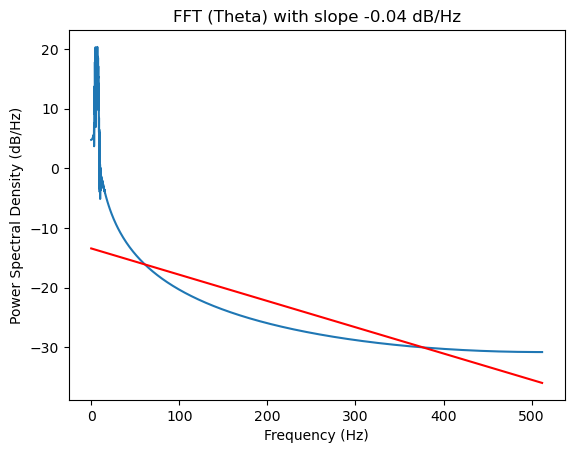

 -------------------*********** For Band: Alpha  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


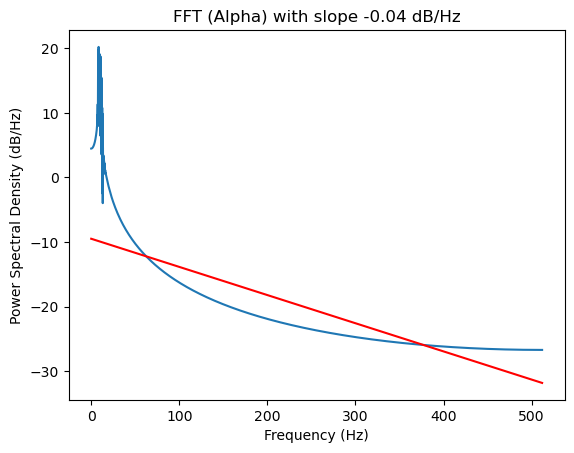

 -------------------*********** For Band: Beta  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


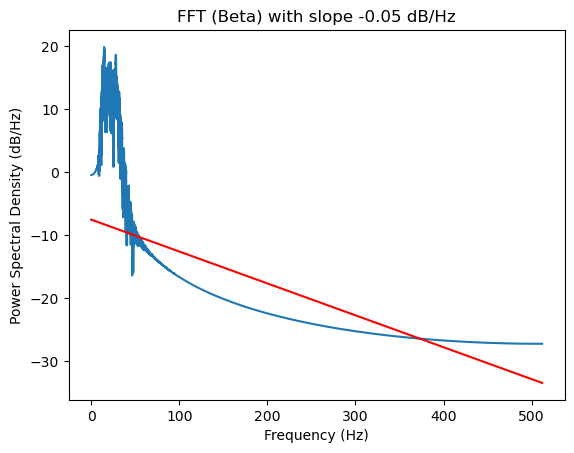

 -------------------*********** For Band: Gamma  ****************---------------------------------
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 0.250 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


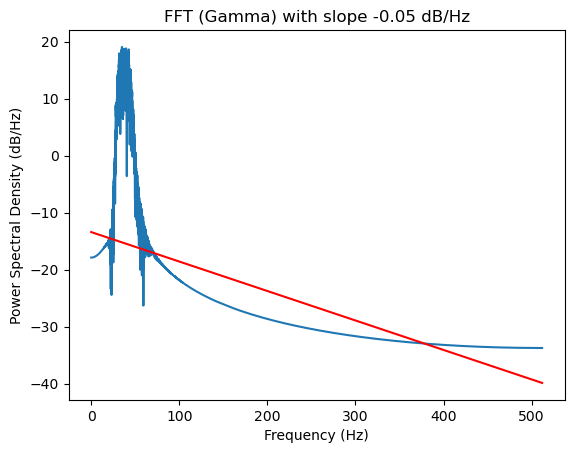

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    emg_picks = mne.pick_types(info, emg=True)
    raw_band = raw.copy().filter(fmin, fmax, picks=emg_picks, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()

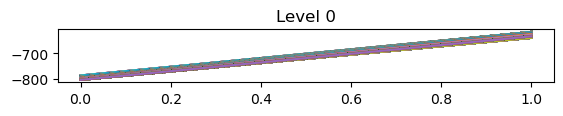

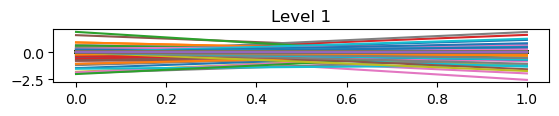

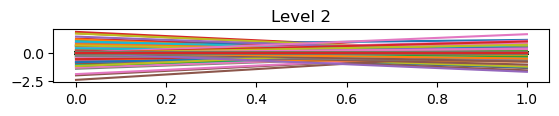

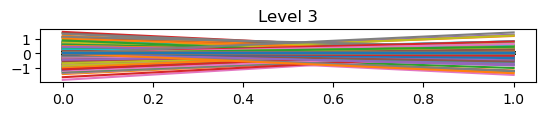

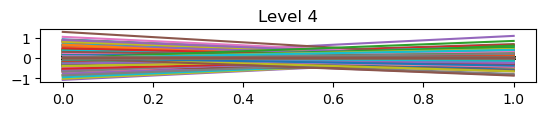

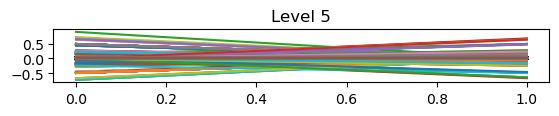

mean_spectrum: [5.18520971e+05 5.18184640e-02 3.23733713e-02 1.84688203e-02
 4.93802634e-03 1.69060553e-03]
var_spectrum: [1.47464454e+10 1.33216941e-08 1.80917203e-04 6.89288033e-05
 5.75367223e-06 5.59145987e-07]


In [27]:
###wavlet transform 

import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

In [28]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming you have the 'raw' object created

# Get the data values from the 'raw' object
data = raw.get_data()

# Compute Granger causality
causality_matrix = np.zeros((len(raw.ch_names), len(raw.ch_names)))
for i, target_channel in enumerate(data):
    for j, source_channel in enumerate(data):
        if i != j:
            result = grangercausalitytests(np.vstack((target_channel, source_channel)).T, maxlag=1, verbose=False)
            p_value = result[1][0]['ssr_chi2test'][1]
            causality_matrix[i, j] = p_value

# Create a DataFrame for the connectivity matrix
df_causality = pd.DataFrame(causality_matrix, index=raw.ch_names, columns=raw.ch_names)

# Print the connectivity matrix in a neat format
df_causality

EMG1          EMG2
EMG1  0.000000e+00  5.308469e-50
EMG2  5.577354e-07  0.000000e+00

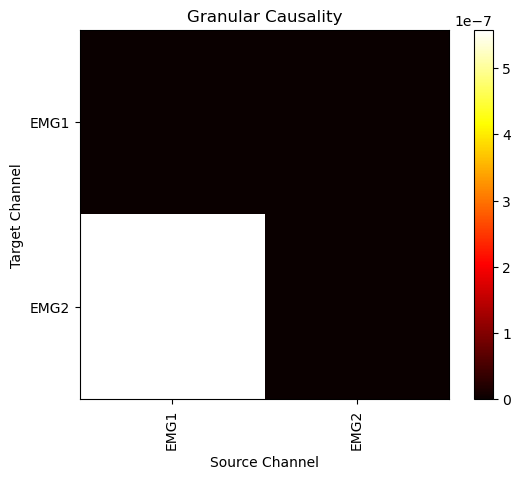

In [29]:
# Plot the connectivity as a heatmap
plt.imshow(causality_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(raw.ch_names)), raw.ch_names, rotation=90)
plt.yticks(np.arange(len(raw.ch_names)), raw.ch_names)
plt.xlabel('Source Channel')
plt.ylabel('Target Channel')
plt.title('Granular Causality')
plt.show()
